# Digit Recognition with ConvNets
In this task, you will carry out digit recognition (using MNIST database) using convolutional neural networks. The same problem was solved in the previous practical using vanilla ANNs. You may compare the performance of a traditional ANN with that of a ConvNet using the same experimental setup.

## Convolutional Neural Networks
Convolutional Neural Networks (CNN) make the assumption that the input are images. The CNN architecture is defined by different layers typically including the Input Layer, Convolutional Layer, Activation Layer (ReLU), Pooling Layer, Fully-Connected Layer. The input layer normally has the shape ‘height x width x depth’. In our example of digit recognition, the shape is 28x28x1 but in colored images the depth would be 3, one for each value in the RGB color model. The input is passed to a convolutional layer using multiple filters, it creates another matrix with different height, width and as deep as many filters defined. A filter is a small window that traverses the image to compute its features. Its output goes into and activation function which in our case is the ReLU function. A pooling layer is employed to reduce the (spatial) dimensionality. Then the fully-connected layer is a normal feed forward layer for classification. It is common to combine the conv layer with another conv to a pooling layer and repeat it n times before going to the fully-connected layer.


In [ ]:
import numpy as np
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pylab as plt
np.random.seed (123) # for reproducibility

The keras Sequential model allows to add layers, each layer having its own architecture and purpose. The idea is to sequentially add different layers to our model until having a Neural Network architecture that can process and classify images of handwritten digits.

## Data Preparation
Every Machine Learning model needs some data preparation. Typical data preparation steps include the following.
-	Load dataset.
-	Separate dataset into training and test datasets.
-	Visualize data to get some intuition.
-	Prepare input data to feed the input layer.
-	Prepare data labels.

In [ ]:
#input image dimensions
img_x, img_y = 28, 28

from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


The load_data() function return two tuples, already splitting the data in training and test collections. The x_train.shape will be (60000, 28, 28), 60,000 examples of 28x28 pixels grayscale images of the 10 digits while y_train is a vector of 60,000 examples where each element is an integer from 0 to 9. Likewise, x_test and y_test contain 10,000 examples. You can visualize few of the digits (similar to Practical 1) to see how the images look like.

The next step is to reshape the input matrix to have the shape samples x height x width x channels, since these are grayscale images the channels will be 1, in other images the channels normally would be 3, one for each color in the RGB color model.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt

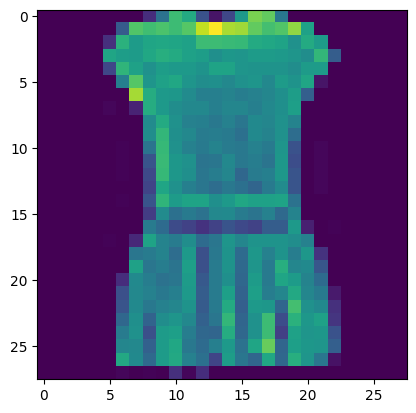

In [ ]:
plt.imshow(x_train[3])

In [ ]:
import pandas as pd
pd.Series(y_train).nunique()

10

In [ ]:
# reshape the data into a 4D tensor:

# (sample_number, x_img_size, y_img_size, num_channels)

# because the MNIST is greyscale, we only have a single channel

# RGB colour images would have 3

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape [0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# convert the data to the right type
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical (y_train, 10)
y_test = to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Network Architecture
The keras Sequential model allows to generate a model for training by adding layers to it. The first layer is a Conv2D layer with a ReLU activation function, 32 filters and a 5x5 convolutional window. Then comes the Pooling layer, where we employ the MaxPooling2D keras layer with a 2x2 pool size. The next conv layer uses 64 filters each of size 5x5. We also use a Dropout layer for to prevent over fitting. After the convolutions, we aim to classify the data with fully connected layers, thus we use a Flatten layer to flat the data to a 1-dimensional vector to be used as input for two Dense (fully-connected) layers. We could use more or less Conv2D layers or change the hyperparameters in each layer, or the total nodes in one of the Dense layers, or use one Dense layer instead of two. Trying several architectures and measuring which generalize better is a common strategy to optimize the performance

### Without Augmentation

In [ ]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=2)

Epoch 1/2
469/469 [==============================] - 12s 5ms/step - loss: 0.4325 - accuracy: 0.8457
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.2887 - accuracy: 0.8947


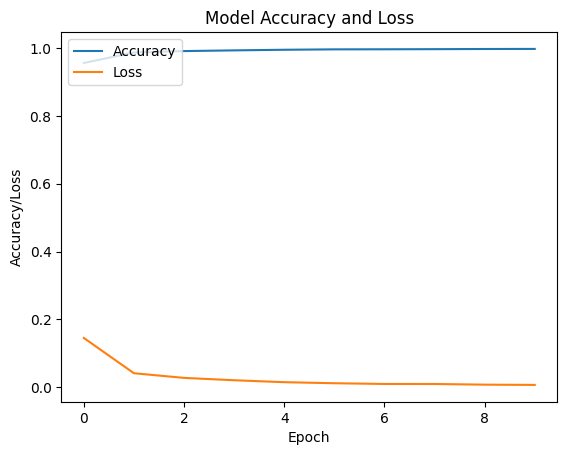

In [ ]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend (['Accuracy', 'Loss'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02887112647294998
Test accuracy: 0.991599977016449


### With Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=0.2
)

datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten ())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train), epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2869 - accuracy: 0.9059
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1104 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0865 - accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0732 - accuracy: 0.9763
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0644 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0577 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0462 - accuracy: 0.9853
Epoch 10/10
1875/1875 [==============================] - 23s 12m

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09548891335725784
Test accuracy: 0.972100019454956


# How Data Augmentation Works?

(750, 1000, 3)


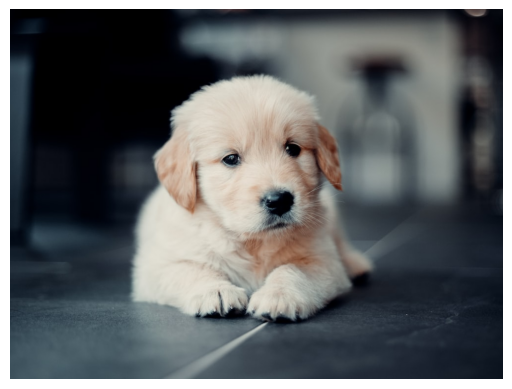

(1, 750, 1000, 3)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

image_path="dog.jpeg"
img = cv2.imread (image_path, cv2. IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print (img.shape)
plt.imshow(img_rgb)
plt.axis ("off")
plt.show()

#Convert 3D Data to 4D: Add one dimensions
img_rgb = img_rgb.reshape((1,)+img_rgb.shape)
print(img_rgb.shape)

datagen = ImageDataGenerator(rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

i = 0
for batch in datagen.flow(img_rgb, save_to_dir='fake_images', save_prefix='dog', save_format='jpeg'):
  i += 1
  if i > 9:
    break